# Mid Term Project

### Business inteligence Project

**Introduction**

H & M Hennes & Mauritz AB (H&M) is a Swedish multinational fast-fashion clothing company headquartered in Stockholm, founded in 1947. Its focus is not only clothing and accesories for men, women, teenagers, and children. But also home decoration and cosmetics is part of this big company .H&M operates in 74 countries with over 5,000 stores.

**Objective**

Recommender Systems are a wonderful way to create subclasses of information, filtering data about customer behaviour to predict the "rating" or "preference" a user would give to an item/product. It's an application especially useful for companies with a wide offer and diverse clients, like H&M. It's a powerful and successful way to recommend  other products that the algorithm thinks will suit the users better.

In this project we will present some insights about the information and possibly sugestions for the recomendation system of H&M based on their dataframe available in internet.


**Material**

We found 3 relevant databases in internet: articles, transactions and customers. 



### 1. Articles database:


This database contains information about the product stock of H&M shops. Atention: the number of this data are not referred to the transactions, but the units of each article. We will have information about the transactions in a different database.

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import boxcox
import matplotlib.ticker as mtick

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.options.display.max_rows = 100


In [92]:
articles = pd.read_csv ('articles.csv')
articles

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105537,953450001,953450,5pk regular Placement1,302,Socks,Socks & Tights,1010014,Placement print,9,Black,...,Socks Bin,F,Menswear,3,Menswear,26,Men Underwear,1021,Socks and Tights,Socks in a fine-knit cotton blend with a small...
105538,953763001,953763,SPORT Malaga tank,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,2,H&M+,1005,Jersey Fancy,Loose-fitting sports vest top in ribbed fast-d...
105539,956217002,956217,Cartwheel dress,265,Dress,Garment Full body,1010016,Solid,9,Black,...,Jersey,A,Ladieswear,1,Ladieswear,18,Womens Trend,1005,Jersey Fancy,"Short, A-line dress in jersey with a round nec..."
105540,957375001,957375,CLAIRE HAIR CLAW,72,Hair clip,Accessories,1010016,Solid,9,Black,...,Small Accessories,D,Divided,2,Divided,52,Divided Accessories,1019,Accessories,Large plastic hair claw.


In [93]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

#### Key figures:

- 105.542 rows in the dataset
- 25 features in the dataset
- 14 of text columns in the dataset
- 11 numeric columns in the dataset
    

Unique indentifier of an article:

- article_id (int64) - an unique 9-digit identifier of the article, 105 542 unique values (as the length of the database)

5 product related columns:

- product_code (int64) - 6-digit product code (the first 6 digits of article_id, 47 224 unique values
- prod_name (object) - name of a product, 45 875 unique values
- product_type_no (int64) - product type number, 131 unique values
- product_type_name (object) - name of a product type, equivalent of product_type_no
- product_group_name (object) - name of a product group, in total 19 groups

2 columns related to the pattern:

- graphical_appearance_no (int64) - code of a pattern, 30 unique values
- graphical_appearance_name (object) - name of a pattern, 30 unique values

2 columns related to the color:

- colour_group_code (int64) - code of a color, 50 unique values
- colour_group_name (object) - name of a color, 50 unique values

4 columns related to perceived colour (general tone):

- perceived_colour_value_id - perceived color id, 8 unique values
- perceived_colour_value_name - perceived color name, 8 unique values
- perceived_colour_master_id - perceived master color id, 20 unique values
- perceived_colour_master_name - perceived master color name, 20 unique values

2 columns related to the department:

- department_no - department number, 299 unique values
- department_name - department name, 299 unique values

4 columns related to the index, which is actually a top-level category:

- index_code - index code, 10 unique values
- index_name - index name, 10 unique values
- index_group_no - index group code, 5 unique values
- index_group_name - index group code, 5 unique values

2 columns related to the section:

- section_no - section number, 56 unique values
- section_name - section name, 56 unique values

2 columns related to the garment group:

- garment_group_n - section number, 56 unique values
- garment_group_name - section name, 56 unique values

1 column with a detailed description of the article:

- detail_desc - 43 404 unique values


**Checking the missing values**

Only one column - detail desc - has missing values but this is a very small fraction of the dataset - about 0.39% (checking the sum, there are only 416 rows with missing values).

In [95]:
articles.isna().sum()/len(articles)*100

article_id                      0.000000
product_code                    0.000000
prod_name                       0.000000
product_type_no                 0.000000
product_type_name               0.000000
product_group_name              0.000000
graphical_appearance_no         0.000000
graphical_appearance_name       0.000000
colour_group_code               0.000000
colour_group_name               0.000000
perceived_colour_value_id       0.000000
perceived_colour_value_name     0.000000
perceived_colour_master_id      0.000000
perceived_colour_master_name    0.000000
department_no                   0.000000
department_name                 0.000000
index_code                      0.000000
index_name                      0.000000
index_group_no                  0.000000
index_group_name                0.000000
section_no                      0.000000
section_name                    0.000000
garment_group_no                0.000000
garment_group_name              0.000000
detail_desc     

In [96]:
articles.isna().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

There are no duplicated rows.

In [106]:
articles.duplicated().sum()

0

We explore what is inside the column "departent_name" to figure out which are the department that have more amount of articles. Those are: "Jersey", "Knitwear" and "Trouser"

In [97]:
department = articles['department_name'].value_counts()
department

Jersey                             4604
Knitwear                           3503
Trouser                            2655
Blouse                             2362
Dress                              2087
                                   ... 
Woven bottoms inactive from S.7       1
Jersey inactive from S.6              1
EQ Divided Blue                       1
Accessories Other                     1
Kids Boy License                      1
Name: department_name, Length: 250, dtype: int64

Here we can see that "Jersey Fancy", "Accessories" and "Jersey Basic" are the most repited values in this column. We can see that two of them coincides with the most repited in the column "department name": "Jersey"

In [102]:
department = articles['garment_group_name'].value_counts()
department

Jersey Fancy                     21445
Accessories                      11519
Jersey Basic                      8126
Knitwear                          7490
Under-, Nightwear                 7441
Trousers                          6727
Blouses                           5838
Shoes                             5145
Dresses Ladies                    4874
Outdoor                           4501
Unknown                           3873
Trousers Denim                    3100
Swimwear                          2787
Socks and Tights                  2272
Shirts                            2116
Woven/Jersey/Knitted mix Baby     1965
Shorts                            1559
Dresses/Skirts girls              1541
Skirts                            1254
Special Offers                    1061
Dressed                            908
Name: garment_group_name, dtype: int64

In [98]:
import matplotlib.ticker as mtick

def plot_bar(database, col, figsize=(13,5), pct=False, label='articles'):
    fig, ax = plt.subplots(figsize=figsize, facecolor='#f6f6f6')
    for loc in ['bottom', 'left']:
        ax.spines[loc].set_visible(True)
        ax.spines[loc].set_linewidth(2)
        ax.spines[loc].set_color('black')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    
    if pct:
        data = database[col].value_counts()
        data = data.div(data.sum()).mul(100)
        data = data.reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)
        ax.set_xlabel('% of ' + label, fontsize=10, weight='bold')
        ax.xaxis.set_major_formatter(mtick.PercentFormatter())
    else:
        data = database[col].value_counts().reset_index()
        ax = sns.barplot(data=data, x=col, y='index', color='#2693d7', lw=1.5, ec='black', zorder=2)        
        ax.set_xlabel('# of articles' + label)
        
    ax.grid(zorder=0)
    ax.text(0, -0.75, col, color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
    ax.set_ylabel('')
        
    plt.show();

Here we can apreciate that "Ladieswear", "Babies/Children" and "Divided" are the group of articles that are dominant in this dataframe. The smallest amount of articles is in Sport group.

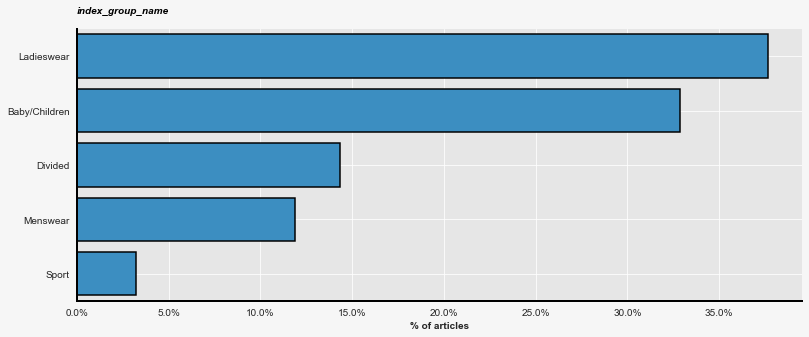

In [101]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plot_bar(articles, 'index_group_name', pct=True)

In [107]:
group = articles['index_group_name'].value_counts()
group

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In this bar plot we can see the index name. In the first position we can see Ladieswear, followed by Divided and Menswear. There are 4 index names dedicated for Children/ Babys, so still we can say that there is a big amount of articles dedicated for this group as we saw in the "index_group_name"

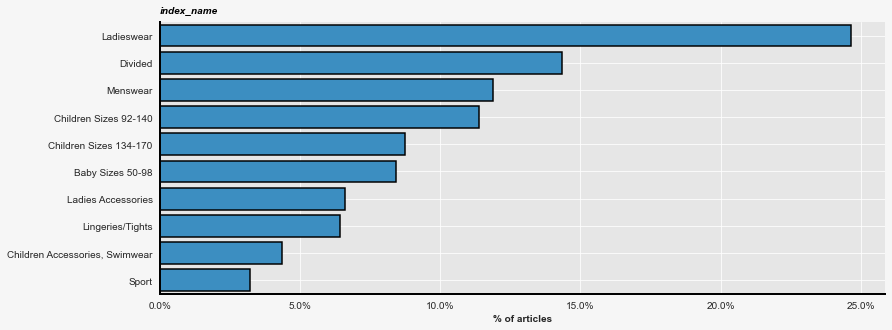

In [104]:

plot_bar(articles, 'index_name', pct=True)

To understand better about the index_name "Divided", we filtered only the rows that are in this category. After a research in the H&M website we could confirm that "Divided" is the line of clothes made for teenagers.

In [108]:
divided = articles[articles['index_name']=='Divided']
divided[['prod_name','product_type_name','detail_desc','index_name','section_name','garment_group_name']].drop_duplicates().head(12)

,prod_name,product_type_name,detail_desc,index_name,section_name,garment_group_name
78,Sigge sneaker sock 5p,Socks,Fine-knit trainer socks in various colours.,Divided,Divided Basics,"Under-, Nightwear"
124,Eva chelsea boot,Boots,Chelsea boots with elasticated gores in the si...,Divided,Divided Accessories,Shoes
125,Jenny 5-pack,Socks,Fine-knit socks.,Divided,Divided Basics,"Under-, Nightwear"
149,Lena over knee.,Socks,Fine-knit over-the-knee socks.,Divided,Divided Basics,"Under-, Nightwear"
175,Tina leggings,Leggings/Tights,Leggings in extra sturdy jersey with an elasti...,Divided,Divided Basics,Jersey Basic
176,Heavy jsy long leg,Leggings/Tights,Leggings in extra sturdy jersey with an elasti...,Divided,Divided Basics,Jersey Basic
186,Jodi skirt,Skirt,"Short, bell-shaped skirt in stretch jersey wit...",Divided,Divided Basics,Jersey Basic
187,Long Leg Leggings,Leggings/Tights,Leggings in stretch jersey with an elasticated...,Divided,Divided Basics,Jersey Basic
189,Raven skirt,Skirt,Short jersey skirt with an elasticated waist.,Divided,Divided Basics,Jersey Basic
193,Carolina sweater (1),Sweater,Long-sleeved top in sweatshirt fabric with rib...,Divided,Divided Basics,Jersey Basic


We see now also that index is a sub-category of index_group. We can create now a multi-index fram with groupings to see the counts:

In [113]:
articles.groupby(['index_group_name', 'index_name']).size()

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
dtype: int64

Even finer category is product_group_name. Let's see what is it's structure and articles counts.

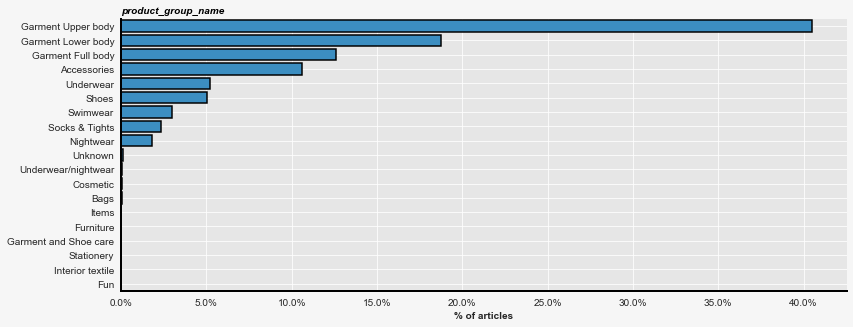

In [109]:
plot_bar(articles, 'product_group_name', pct=True)

In [117]:
#rever isso aqui:

The barchart above shows that most of articles lays in only few groups. Let's see the cumulative sum.

In [116]:
data = articles['product_group_name'].value_counts()
data = data.div(data.sum()).mul(100)
data

Garment Upper body       40.496674
Garment Lower body       18.771674
Garment Full body        12.594038
Accessories              10.572095
Underwear                 5.201721
Shoes                     5.005590
Swimwear                  2.962802
Socks & Tights            2.313771
Nightwear                 1.799284
Unknown                   0.114646
Underwear/nightwear       0.051164
Cosmetic                  0.046427
Bags                      0.023687
Items                     0.016107
Furniture                 0.012317
Garment and Shoe care     0.008527
Stationery                0.004737
Interior textile          0.002842
Fun                       0.001895
Name: product_group_name, dtype: float64

In this barplot we can see which are the colors that are more predominant in the articles. The black colour is significantly more domimant than the resto of the colors. 

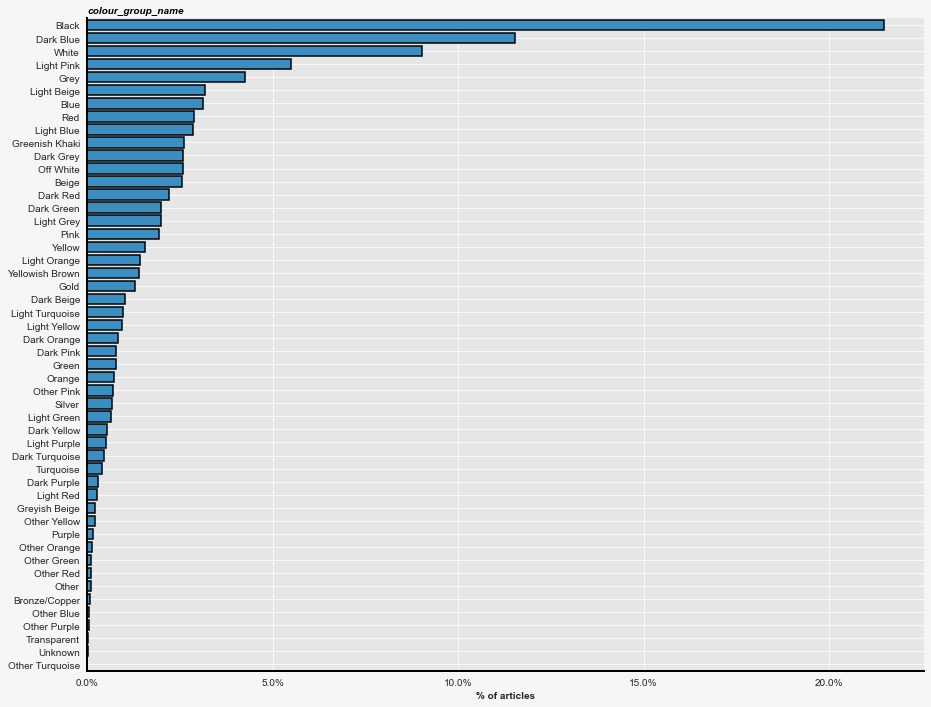

In [110]:
plot_bar(articles, 'colour_group_name', figsize=(15,12), pct=True)

We thought it was interesting to show this barplot of the perception of the colors to see which are the type of colours that are more present in the articles.

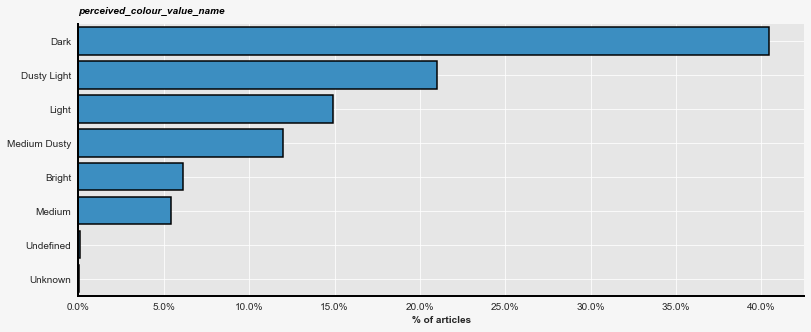

In [111]:
plot_bar(articles, 'perceived_colour_value_name', pct=True)

### 2. Customer database:


Here we find some information about the customers of H&M. This kind of data allows the company to tune their recomender system. This data contains information which can be treated as 'static' or slowly-changing. Usually the companies collect features like sex, age, address, etc. However, in this dataframe we will not find information about the gender of the customers, as we see below:

In [3]:
customers = pd.read_csv ('customers.csv')
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.0,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.0,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


#### Key figures:

- 1.371.980 rows in the dataset
- 7 features in the dataset
- 4 of text columns in the dataset
- 3 numeric columns in the dataset
    

Unique indentifier of a customer:

- customer_id - an unique identifier of the customer

6 customer related columns:

- FN - binary feature (1 or NaN)
- Active - binary feature (1 or NaN)
- club_member_status - status in a club, 3 unique values
- fashion_news_frequency - frequency of sending communication to the customer, 4 unique values
- age - age of the customer
- postal_code - postal code (anonimized), 352 899 unique values

Only customer id and postal code are completely filled. Age, fashion news frequency have around 1% misssing data, FN has 65% missing and Active has 66% missing data.

In [33]:
def missing_data(customer):
    total = customer.isnull().sum().sort_values(ascending = False)
    percent = (customer.isnull().sum()/customer.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [34]:
missing_data(customers)

,Total,Percent
fashion_news_frequency,16009,1.166854
age,15861,1.156066
club_member_status,6062,0.441843
customer_id,0,0.000000
FN,0,0.000000
Active,0,0.000000


The column "Postal code" is not in clear, it is coded, same as customer id. Therefore, we will remove this column, as we will not use it for our analyses.




In [14]:
def drop_columns(customers):
    customers.drop(columns=["postal_code"], inplace=True)
    return customers

In [15]:
drop_columns(customers)

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0
...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0


To try to better understand the nature of the data, we will surch for a relation between the two columns "FN" (that we assume are the initials for "Fashion News") and "fashion_news_frequency" to possibly identify a connection between both features. Here I'll replace NaN for columns FN and Active with 0.

In [21]:
customers_backup = customers.copy()
customers[['FN','Active']] = customers[['FN','Active']].fillna(0)
customers

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0
...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,0.0,0.0,ACTIVE,NONE,24.0
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,0.0,0.0,ACTIVE,NONE,21.0
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.0,1.0,ACTIVE,Regularly,21.0
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.0,1.0,ACTIVE,Regularly,18.0


Now we can see that the number of unique values of 0.0 in the "FN" column are closed to the number of "None" in "Fashion News Frequency". The value of 1.0 in "FN" is, in turn, similar to "Regularly" in "Fashion News Frequency".

In [16]:
FN = customers['FN'].value_counts()
FN

0.0    895050
1.0    476930
Name: FN, dtype: int64

In [17]:
FN_freq = customers['fashion_news_frequency'].value_counts()
FN_freq


NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

We can confirm the relationship between these values in the spreadsheet below, which shows that the values of "None" in "Fashion News Frequency" column are mostly related to item 0.0 of the column "FN". The values of "Regularly" in "Fashion News Frequency" are related to 1.0 in "FN". But there's a small percentage of the people that receive fashion news regularly and are in the item 0.0 of the "FN" column.

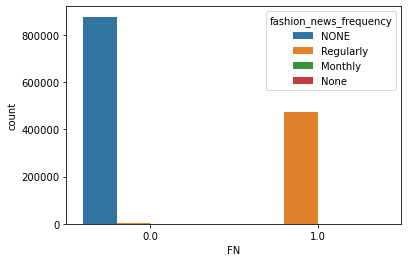

In [19]:
sns.countplot(x='FN', hue='fashion_news_frequency', data=customers)
plt.show();

We can also see some relation between the column "FN" and "Active".

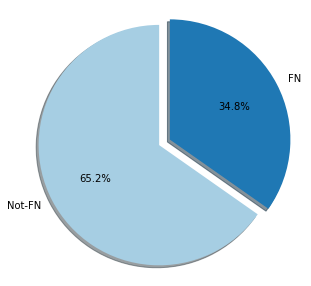

In [23]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(customers['FN'].value_counts(), explode=explode, labels=['Not-FN','FN'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show();

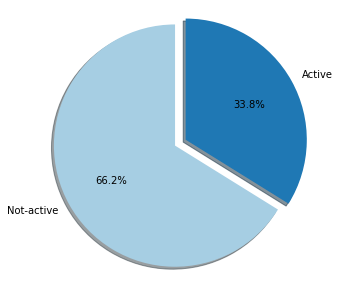

In [31]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(customers['Active'].value_counts(), explode=explode, labels=['Not-active','Active'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
plt.show();

Percentage of customers that have both FN and Active status: 33.85%. It look that all custmoers that are Active have also FN status. But reverse is not true - not all users with FN status are active, as we can see in the chart below:

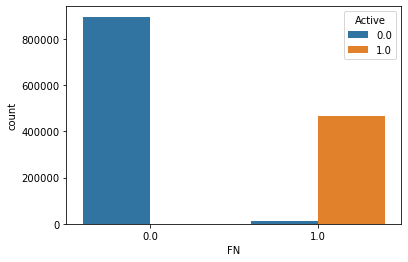

In [32]:
sns.countplot(x='FN', hue='Active', data=customers)
plt.show();

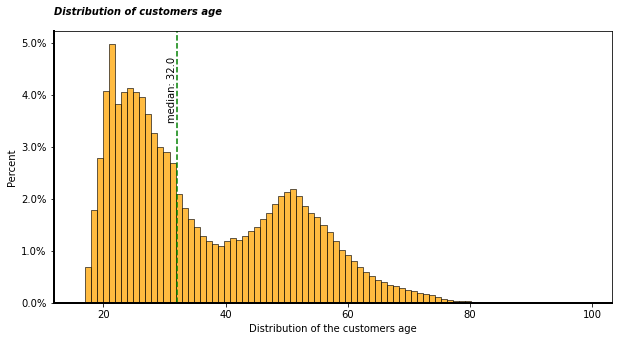

In [40]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=customers['age'].nunique(), color='orange', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
median = customers['age'].median()
ax.axvline(x=median, color="green", ls="--")
ax.text(median, 3.5, 'median: {}'.format(round(median,1)), rotation='vertical', ha='right')
ax.text(12, 5.5, 'Distribution of customers age', color='black', fontsize=10, ha='left', va='bottom', weight='bold', style='italic')
plt.show();

The distribution shows that there are two main age-groups of customers: around 20-30 years old and 45-55 years old.

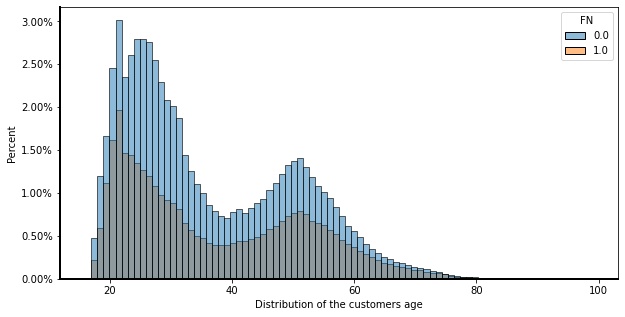

In [41]:
fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=customers, x='age', bins=customers['age'].nunique(), hue='FN', stat="percent")
ax.set_xlabel('Distribution of the customers age')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

Therefore, we did some data cleaning, removing the "FN" column, as this column will be redundant for further analyses.

In [ ]:
# As pessoas que receberam FN estao ativas. Checar se isso tem a ver com as vendas tambem.

### 3. Transactions database:

in this trans dataframe we can see the transactions every day, during the period between September 2018 and September 2020.

In [53]:
transactions = pd.read_csv ('transactions_train.csv')
transactions

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2
...,...,...,...,...,...
31788319,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,929511001,0.059305,2
31788320,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,891322004,0.042356,2
31788321,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,918325001,0.043203,1
31788322,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,833459002,0.006763,1


The data collected pertains to the period from September 2018 to September 2020.

In [8]:
days = transactions['t_dat'].value_counts()
days

2019-09-28    198622
2020-04-11    162799
2019-11-29    160875
2018-11-23    142018
2018-09-29    141700
               ...  
2019-01-01     18145
2018-09-22     17635
2018-12-25     14799
2019-12-25     13637
2020-01-01     12760
Name: t_dat, Length: 734, dtype: int64

In [10]:
transactions['t_dat'].max()

'2020-09-22'

In [11]:
transactions['t_dat'].min()

'2018-09-20'

#### Key figures:

- 31.788.324 rows in the dataset
- 5 features in the dataset
- 1 text column in the dataset
- 3 numeric columns in the dataset

Columns description:

- t_dat - date of a transaction in format YYYY-MM-DD but provided as a string
- customer_id - identifier of the customer which can be mapped to the customer_id column in the customers table
- article_id - identifier of the product which can be mapped to the article_id column in the articles table
- price - price paid
- sales_channel_id - sales channel, 2 unique values

In [54]:
transactions.isna().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

There are no missing data.

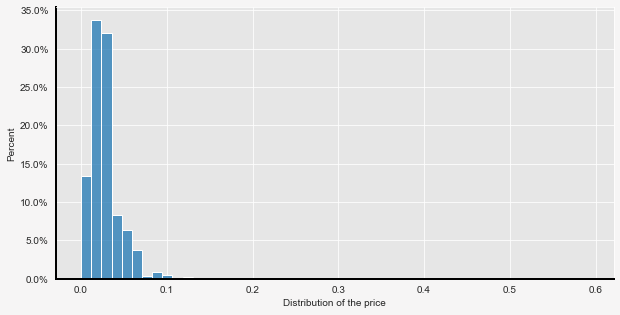

In [56]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
ax = sns.histplot(data=transactions, x='price', bins=50, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

It's clear from the above graph that the value of prices are standardized and there's a lot o outliers. That's why we cutted the values above 0.1.

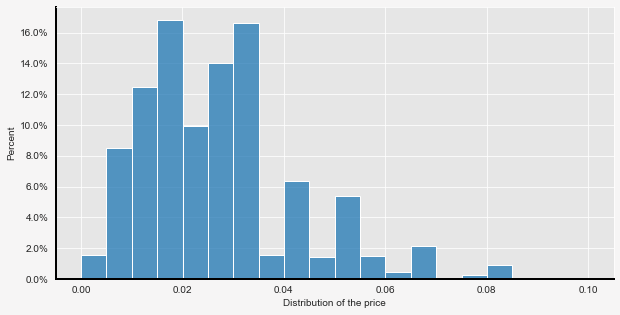

In [58]:
fig, ax = plt.subplots(figsize=(10,5), facecolor='#f6f5f5')
data = transactions[transactions['price']<0.1]
ax = sns.histplot(data=data, x='price', bins=20, stat="percent")
ax.set_xlabel('Distribution of the price')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

In [59]:
#os produtos mais caros sao os mais vendidos?

In [71]:
begin = transactions['t_dat'].min()
end = transactions['t_dat'].max()
print('Date range is from {} to {}.'.format(begin.date(), end.date()))


Date range is from 2018-09-20 to 2020-09-22.


In [72]:
transactions['t_dat'] = pd.to_datetime(transactions['t_dat'])
t_per_day = transactions.groupby('t_dat',as_index=False).count()

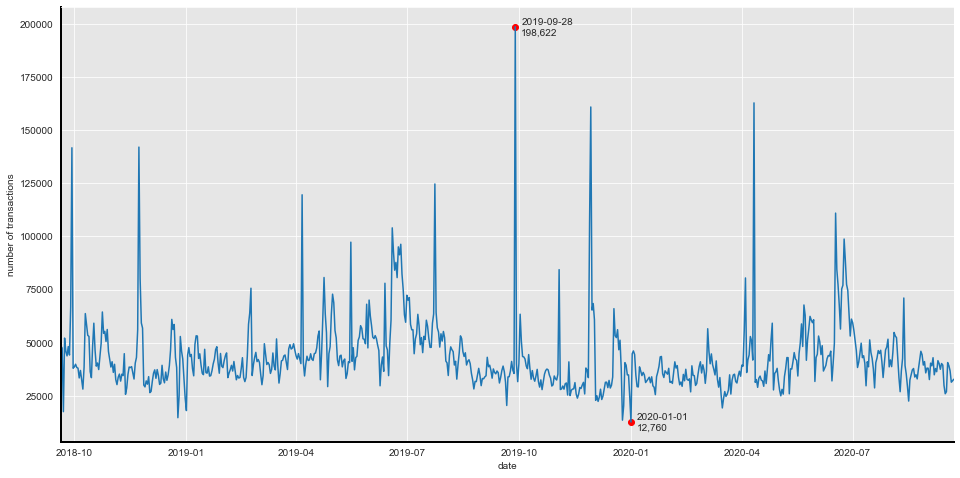

In [78]:
fig, ax = plt.subplots(figsize=(16,8))

sns.lineplot(data=t_per_day, x='t_dat',y='customer_id')

ax.set_xlabel('date')
ax.set_ylabel('number of transactions')

max_t = t_per_day['customer_id'].max()
max_t_date = t_per_day[t_per_day['customer_id']==max_t]['t_dat']
ax.scatter(max_t_date, max_t, c='red')
ax.text(max_t_date+pd.DateOffset(days=5), max_t-4000, '{}\n{:,d}'.format(max_t_date.iloc[0].date(), max_t))

min_t = t_per_day['customer_id'].min()
min_t_date = t_per_day[t_per_day['customer_id']==min_t]['t_dat']
ax.scatter(min_t_date, min_t, c='red')
ax.text(min_t_date+pd.DateOffset(days=5), min_t-4000, '{}\n{:,d}'.format(min_t_date.iloc[0].date(), min_t))
ax.set_xlim(transactions['t_dat'].min(),transactions['t_dat'].max())

for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')

plt.show();

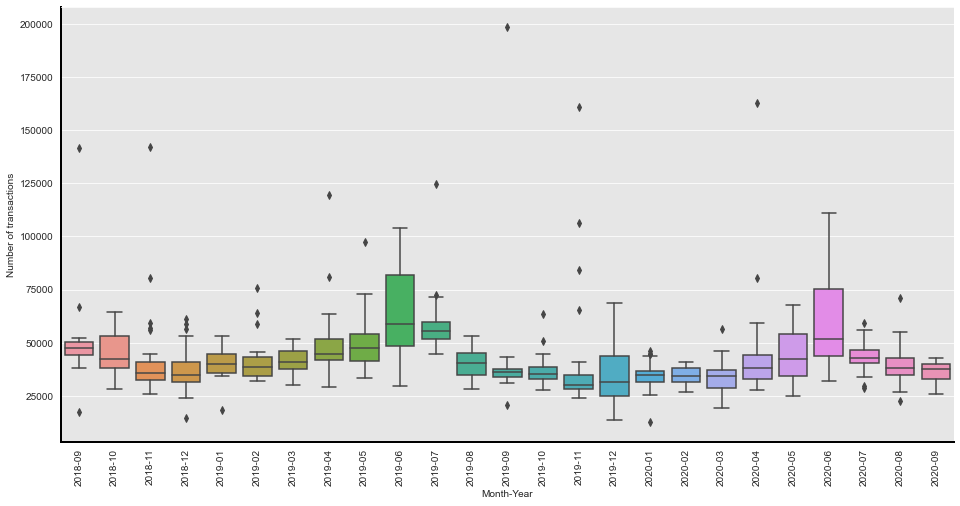

In [80]:
trans_gr_month = transactions.groupby('t_dat').size().rename("no_transactions")
trans_gr_month = trans_gr_month.reset_index()
trans_gr_month['month_year'] = trans_gr_month['t_dat'].dt.to_period('M')

fig, ax = plt.subplots(figsize=(16,8))
ax = sns.boxplot(x="month_year", y='no_transactions', data=trans_gr_month)
plt.xticks(rotation=90)
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.set_xlabel('Month-Year')
ax.set_ylabel('Number of transactions')
plt.show();

The bar chart above show us that per day usuall number of transactions lays in range about between 25 000 and 80 000 transactions per day. We see also that sales spikes during summertime and drops during winter.

Now, let's see how many transactions, on average, customers do.

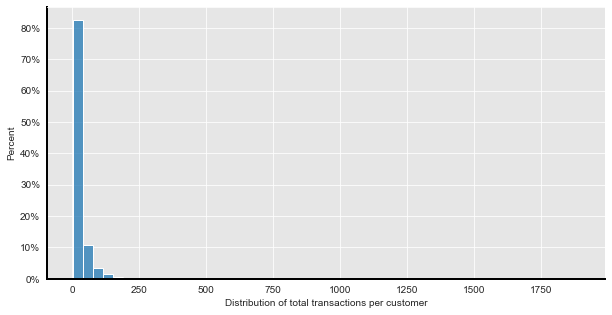

In [82]:
t_by_customer = transactions.groupby('customer_id', as_index=False).size()

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=t_by_customer, x='size', bins=50, stat="percent")
ax.set_xlabel('Distribution of total transactions per customer')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

Clearly there's a lot of outliers. Let's look at the distribution after cutting everything above 50 trasactions per customer.

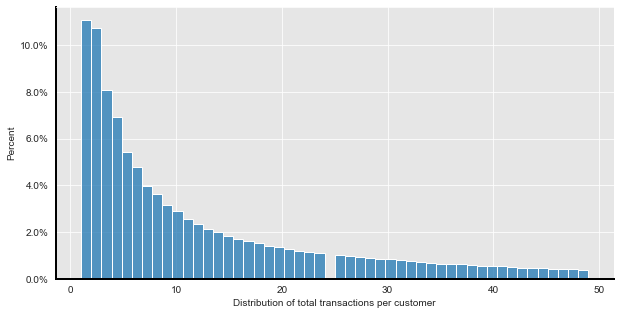

In [83]:
t_by_customer_50tr = t_by_customer[t_by_customer['size'] < 50]

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.histplot(data=t_by_customer_50tr, x='size', bins=50, stat="percent")
ax.set_xlabel('Distribution of total transactions per customer')
for loc in ['bottom', 'left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
plt.show();

The graph above shows us that most of customers, on average, bought only few items during these 2 years.

Let's see now the popularity of sale channels.

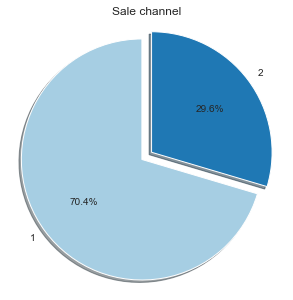

In [84]:
fig, ax = plt.subplots(figsize=(5,5))
explode = (0, 0.1)
colors = sns.color_palette('Paired')
ax.pie(transactions['sales_channel_id'].value_counts(), explode=explode, labels=['1','2'],
       autopct='%1.1f%%',shadow=True, startangle=90, colors=colors)
ax.axis('equal')
ax.set_title('Sale channel')
plt.show();

# 4. Combined databases EDA

In [86]:
#trans['month'] = trans['t_dat'].dt.month
#trans['year'] = trans['t_dat'].dt.year
transactions['year_month'] = transactions['t_dat'].dt.to_period('M')
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id,year_month
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2,2018-09
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2,2018-09
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2,2018-09
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2,2018-09
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2,2018-09


In [87]:
trans_grouped = transactions.groupby(['year_month', 'article_id']).size().rename('total_per_article').to_frame()

In [88]:
trans_grouped.head()

total_per_article
year_month article_id                   
2018-09    108775015                 662
           108775044                 283
           108775051                  59
           110065001                  69
           110065002                  27

In [89]:
#trans_grouped.reset_index(inplace=True)

In [ ]:
#art_trans = pd.merge(articles[['article_id', 'index_name']], trans_grouped, on='article_id')

In [90]:
#art_trans = art_trans.groupby(['year_month','index_name'])['total_per_article'].sum().to_frame()
#art_trans.head()